**1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.**

The Standard Error of the Mean (SEM) and Standard Deviation (SD) are somewhat related but distinct concepts used in statistics to present variability.

Standard Deviation (SD) is a measure of the variability or spread of a set of individual data points in a population or sample. It tells us how much the individual data points deviate from the mean of the dataset. A larger standard deviation means the data points are more spread out, while a smaller standard deviation means they are more tightly clustered around the mean.

Standard Error of the Mean (SEM) is the standard deviation of the sample means if you repeatedly took samples from the population. It estimates how much the sample mean is likely to fluctuate from the true population mean. It measures the precision of the sample mean as an estimate of the population mean. A smaller SEM means the sample mean is a more accurate reflection of the population mean. The SEM decreases as the sample size increases because larger samples provide more accurate estimates of the population mean.

Standard deviation describes the variability of individual data points, while standard error of the mean describes the variability of sample means. SEM is usually smaller than SD, especially as the sample size increases, because it accounts for how the sample means become more stable with larger sample sizes. SD gives a sense of the spread of data, whereas SEM gives a sense of how precisely we know the population mean.

In the context of bootstrapping, when you generate multiple resampled datasets (bootstrap samples) and calculate the mean for each sample, the distribution of those means will have a spread. The standard deviation of that distribution of bootstrap means is comparable to the SEM. The bootstrapped SEM provides an estimate of how the sample mean is expected to vary if we repeatedly took samples from the population.

**2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.**

To create a 95% confidence interval using the standard error of the mean (SEM) that covers 95% of the bootstrapped sample means, first, perform bootstrap resampling by repeatedly sampling from the original dataset with replacement and computing the sample mean for each resample. This generates a distribution of bootstrapped sample means. Next, calculate the standard error of the mean (SEM) from these bootstrapped sample means. The 95% confidence interval is then derived by taking the original sample mean and adding and subtracting 1.96 times the SEM. This interval, based on the assumption of normality, should cover approximately 95% of the bootstrapped sample means, giving a measure of uncertainty in the estimate.

To create a 95% bootstrapped confidence interval using the bootstrapped sample means directly (without using the standard deviation of the means to estimate the standard error), follow these steps:

Generate bootstrapped means: Take many resamples (with replacement) from your original sample and calculate the mean of each resample. This gives you a distribution of bootstrapped means.

Sort the bootstrapped means: Arrange the bootstrapped means from smallest to largest.

Find the percentiles: To create a 95% confidence interval, cut off the lowest 2.5% and the highest 2.5% of the bootstrapped means. This leaves the central 95% of the data.

The lower bound is the 2.5th percentile. The upper bound is the 97.5th percentile. Report the interval: The interval between these two percentiles is your 95% bootstrapped confidence interval.

**4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).**

In [1]:
import numpy as np

# Sample data (you can replace this with your own sample data)
data = np.array([5, 7, 9, 10, 15, 20, 25, 30, 35, 40])

# Function to bootstrap and calculate the confidence interval for a given statistic
def bootstrap_confidence_interval(data, statistic_func, num_bootstrap=1000, confidence_level=0.95):
    """
    Perform bootstrap resampling to calculate the confidence interval for a given statistic.

    Parameters:
    - data: The original sample data.
    - statistic_func: A function that calculates the statistic (e.g., np.mean for the mean).
    - num_bootstrap: Number of bootstrap resamples to generate.
    - confidence_level: The desired confidence level (default is 0.95 for 95% confidence).

    Returns:
    - The lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap samples and calculate the statistic for each resample
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic_func, axis=1, arr=bootstrap_samples)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    lower_bound = np.percentile(bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(bootstrap_statistics, upper_percentile)
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the population mean
mean_confidence_interval = bootstrap_confidence_interval(data, np.mean)
print("95% bootstrap confidence interval for the population mean:", mean_confidence_interval)

# How to modify the code to calculate the confidence interval for the median
# Change np.mean to np.median in the function call to calculate the confidence interval for the median
median_confidence_interval = bootstrap_confidence_interval(data, np.median)
print("95% bootstrap confidence interval for the population median:", median_confidence_interval)


95% bootstrap confidence interval for the population mean: (12.6, 26.5)
95% bootstrap confidence interval for the population median: (9.0, 30.0)


Explanation:

You start with a sample (data). This is the dataset you have, and you want to estimate the population mean or another parameter using this data.

bootstrap_confidence_interval function: This function takes the sample data and performs bootstrap resampling.

It accepts the following parameters:

data: Your original sample data.
statistic_func: The function to calculate the statistic you're interested in (e.g., np.mean for the mean or np.median for the median).
num_bootstrap: Number of bootstrap resamples. More resamples give a more accurate confidence interval.
confidence_level: The desired confidence level (default is 95%).
Bootstrap resampling: The code resamples from the original data with replacement (this is how bootstrapping works). It repeats this process many times (num_bootstrap times). For each resample, it computes the statistic you're interested in (mean, median, etc.).

Confidence interval calculation: After collecting the bootstrapped statistics (e.g., bootstrapped means), the code calculates the confidence interval by finding the 2.5th percentile and the 97.5th percentile (for a 95% confidence interval). This gives you the range that contains 95% of the bootstrapped statistics.

For the population mean: The line mean_confidence_interval = bootstrap_confidence_interval(data, np.mean) calculates the 95% confidence interval for the population mean.

For other statistics (e.g., the median): To calculate the confidence interval for another statistic, such as the median, just change np.mean to np.median in the function call: median_confidence_interval = bootstrap_confidence_interval(data, np.median)

Output: This code will print two confidence intervals:

A 95% bootstrap confidence interval for the population mean.
A 95% bootstrap confidence interval for the population median, demonstrating how to calculate it for a different statistic.

**5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.**


It's important to differentiate between a population parameter and a sample statistic:

- The population parameter is the actual, but unknown, value we want to estimate, such as the population mean.
- The sample statistic is what we calculate from the data we gather, like the sample mean.

A confidence interval provides a range based on the sample statistic that likely includes the population parameter. We use the sample statistic to infer information about the population, keeping in mind that the sample is only one subset, and the true population parameter remains unknown.

**CHAT GPT SUMMARY**

Standard Error of the Mean (SEM) vs. Standard Deviation (SD):

Standard Deviation (SD) measures the dispersion of individual data points in a dataset around the mean.
Standard Error of the Mean (SEM) estimates how far the sample mean is likely to be from the true population mean and reflects the variability of sample means.

Creating a 95% Confidence Interval:

To create a 95% confidence interval using SEM:
Calculate the sample mean.
Calculate SEM.
Use a critical value (e.g., 1.96 for normal distribution) to construct the interval:
𝑥
ˉ
±
(
𝑧
⋅
𝑆
𝐸
𝑀
)
x
ˉ
 ±(z⋅SEM).
 
For bootstrapping, the confidence interval can be constructed using the 2.5th and 97.5th percentiles of the bootstrapped means.
Bootstrap Confidence Interval Code:


I provided Python code to generate a 95% bootstrap confidence interval for the population mean and showed how to adapt it for the population median.
The code samples data, performs bootstrapping, calculates the specified statistic (mean or median), and computes the confidence interval using percentiles.

https://chatgpt.com/c/66ff512b-92f4-8013-9f9b-b4f9c7393e09

**6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.**

What is the process of bootstrapping?
- Bootstrapping is a way to make lots of copies of your data to figure out what the full picture might look like. Imagine you only have a small sample of information like a few test scores. You randomly pick scores from that sample even picking the same score more than once, and you do this many times. Each time you make a new copy of your sample, you calculate something, like the average score. After doing this a bunch of times, you get an idea of how much your sample can vary.


What is the main purpose of bootstrapping?
- We use bootstrapping to guess how accurate something like the average or a percentage is when we only have a small amount of data. It helps us get a better idea of what the real answer might be if we had more data.
The main reason people use bootstrapping is when they want to understand something about a population but don't have a lot of data. It's like of an easier way of estimating uncertainty. If you don’t know what the whole population looks like, bootstrapping gives a sense of how much your sample might vary from the population. It helps you estimate things like confidence intervals which is how certain you are about a value or to test hypotheses.



If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
- Let’s say you think the average score on a test is 75, but you only have a small set of test scores. Here’s how you can use bootstrapping to check if your guess is reasonable: Create many new samples from your original test scores by randomly picking from them over and over.
For each new sample, calculate the average score.
After you’ve done this a bunch of times, you’ll have a range of possible averages.
Now see if your guess (75) fits in with those averages. If it’s close to them, your guess might be right. If it’s way off, maybe your guess isn’t right.
Bootstrapping just helps you see if your guess makes sense based on the data you have!


Lets say you think the average score on a test is 75, but you only have a small set of test scores to work with. You would use bootstrapping to check if that guess makes sense. You take your original scores and randomly make a bunch of new samples by picking scores from that set over and over, you can even pick the same score more than once. Then, for each new sample, you figure out the average. After you’ve done this a bunch of times, you’ll have a whole range of possible averages. Now, you just see if your guess, 75 fits in with those numbers. If 75 is close to the other averages, your guess might be right. But if 75 is way off from most of them, maybe it’s not. Basically, bootstrapping helps you figure out if your guess is reasonable by using the data you’ve got.

**7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.**

The null hypothesis assumes there’s no effect. Basically, the drug doesn’t work, on average, it does nothing. When we calculate a confidence interval, we’re estimating a range where the true effect might fall, based on our sample data.

If this confidence interval includes zero, it means that one possible value for the drug’s effect is zero (no effect). So, we can’t confidently say the drug has an effect, because zero (the no-effect value) is still a possibility. Even if our sample mean (the observed average effect) isn’t zero, the fact that zero is within the confidence interval means we don’t have enough evidence to reject the null hypothesis.

If the confidence interval doesn’t include zero, that’s a strong sign that the drug’s effect is not zero. In other words, we can say the drug has some effect. So, if zero is outside the confidence interval, we reject the null hypothesis because there’s enough evidence to suggest the drug is doing something.

- If zero is in the confidence interval, we fail to reject the null hypothesis because the drug could have no effect.
- If Zero is not in the confidence interval? We reject the null hypothesis because we have enough evidence to say the drug has an effect.

It’s all about whether zero is a possible outcome for the effect. If it is, we can’t confidently say the drug works. If it’s not, we can say the drug likely has an effect.

**CHAT GPT SUMMARY**
Bootstrapping:

We discussed the process of bootstrapping, which involves starting and growing a business with minimal external funding, focusing on self-funding and gradual growth. The purpose includes maintaining control, reducing risk, ensuring flexibility, and fostering resilience.
Bootstrapping and Hypothesis Testing:

You asked how to use bootstrapping to assess the plausibility of a hypothesized mean in a population. The steps involved calculating the sample mean, generating bootstrap samples, calculating bootstrap means, constructing a confidence interval, and comparing the hypothesized mean with the interval.
Hypothesis Testing and Confidence Intervals:

We explored the relationship between confidence intervals and hypothesis testing, particularly how a confidence interval that overlaps zero indicates failing to reject the null hypothesis (no effect). Despite a sample mean not being zero, if the interval includes zero, it suggests that the drug could have no effect on average. Conversely, rejecting the null hypothesis occurs when the confidence interval does not overlap zero, indicating significant evidence of an effect.

https://chatgpt.com/c/66ff528f-0cf0-8013-97dc-e419fb104719

**8. Vaccine Data Analysis Assignment**

**Problem Introduction**

The goal of this analysis is to determine whether the vaccine developed by AliTech significantly improves the health of patients who take it. The health of the patients is measured by an InitialHealthScore (before the vaccine) and a FinalHealthScore (after the vaccine).

The null hypothesis in this context is that there is no effect of the vaccine on health scores. The vaccine does not change the health scores significantly, and any differences in the scores are due to random variation.

In this context, we need to test the Null Hypothesis (H0) of "no effect," which means that the vaccine has no impact on the patients' health. If this hypothesis is true, the changes in health scores between the initial and final measurements are simply due to random chance or other factors unrelated to the vaccine. Conversely, the Alternative Hypothesis (H1) suggests that the vaccine has an effect, meaning the health scores will show a statistically significant difference.

The goal of our analysis is to test whether the vaccine had a statistically significant impact, thereby allowing us to either reject or fail to reject the null hypothesis.

**Data Visualization**

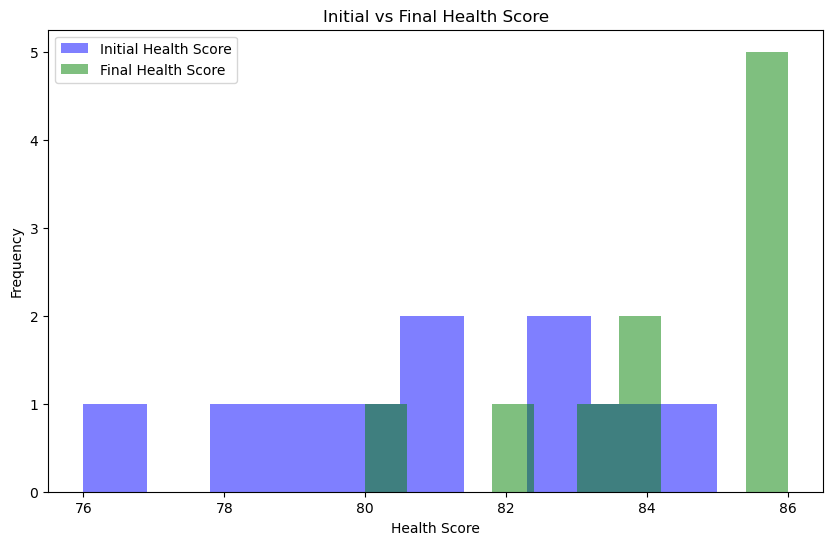

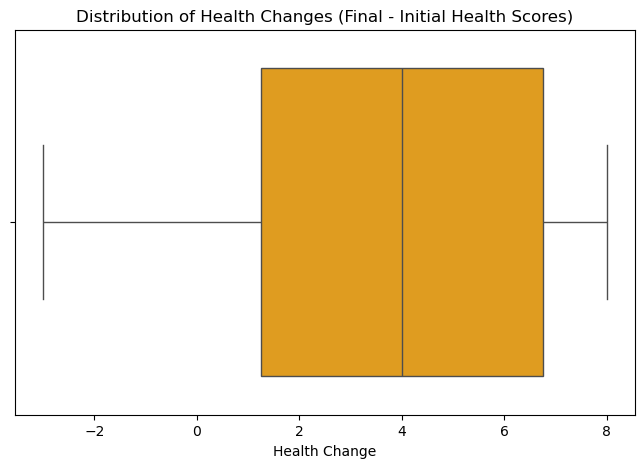

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = pd.DataFrame({
    'PatientID': range(1, 11),
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the HealthChange
data['HealthChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Histogram of Initial and Final Health Scores
plt.figure(figsize=(10, 6))
plt.hist(data['InitialHealthScore'], alpha=0.5, label='Initial Health Score', bins=10, color='blue')
plt.hist(data['FinalHealthScore'], alpha=0.5, label='Final Health Score', bins=10, color='green')
plt.legend(loc='upper left')
plt.title('Initial vs Final Health Score')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Health Change
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['HealthChange'], color='orange')
plt.title('Distribution of Health Changes (Final - Initial Health Scores)')
plt.xlabel('Health Change')
plt.show()

**Quantative Analysis**

In this assignment, we want to know if the vaccine significantly improved health scores. We have a small sample (10 patients), and traditional statistical tests might not be powerful enough to detect differences with such a small dataset. Bootstrapping allows us to create many simulated versions of the dataset by randomly resampling the patients. This gives us an empirical distribution of the difference in means between Final Health Score and Initial Health Score without making strong assumptions about the underlying data distribution.

By applying bootstrapping, we will be able to estimate confidence intervals for the mean and median difference in health scores. This will allow us to statistically test the null hypothesis.

We start with the observed data, each patient’s Initial Health Score and Final Health Score. The key statistic we are interested in is the mean difference between the final and initial scores. We repeatedly (1,000 times) create new datasets by sampling patients from the original dataset with replacement. Each sample has the same number of patients as the original, but some patients might appear multiple times, while others might not appear at all in a given sample. This draws new samples from the same population.For each of these bootstrapped samples, we compute the mean difference between the Final Health Score and the Initial Health Score. After generating 1,000 bootstrapped samples, we end up with a distribution of 1,000 mean differences. This distribution represents what we might expect the mean difference to be if we repeatedly sampled from the population. We calculate a 95% confidence interval by taking the 2.5th and 97.5th percentiles of the bootstrapped mean differences. This interval gives us an idea of the range within which the true mean difference (for the entire population) is likely to fall.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create a DataFrame from the given data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Function to perform bootstrapping and calculate confidence intervals
def bootstrap_confidence_interval(data, statistic_func, num_bootstrap=1000, confidence_level=0.95):
    """
    Perform bootstrap resampling to calculate the confidence interval for a given statistic.

    Parameters:
    - data: The original sample data.
    - statistic_func: A function that calculates the statistic (e.g., np.mean or np.median).
    - num_bootstrap: Number of bootstrap resamples to generate.
    - confidence_level: The desired confidence level (default is 0.95 for 95% confidence).

    Returns:
    - The lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap samples and calculate the statistic for each resample
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic_func, axis=1, arr=bootstrap_samples)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    lower_bound = np.percentile(bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(bootstrap_statistics, upper_percentile)
    
    return lower_bound, upper_bound

# Get the differences between Final and Initial Health Scores
score_differences = df['FinalHealthScore'] - df['InitialHealthScore']

# Calculate the 95% bootstrap confidence interval for the mean of the differences
mean_confidence_interval = bootstrap_confidence_interval(score_differences, np.mean)
print("95% bootstrap confidence interval for the mean difference:", mean_confidence_interval)

# Calculate the 95% bootstrap confidence interval for the median of the differences
median_confidence_interval = bootstrap_confidence_interval(score_differences, np.median)
print("95% bootstrap confidence interval for the median difference:", median_confidence_interval)

95% bootstrap confidence interval for the mean difference: (0.7, 5.5)
95% bootstrap confidence interval for the median difference: (0.0, 7.0)


The result from this methodology will output two confidence intervals as shown above:

- 95% Confidence Interval for the Mean Difference: This interval tells us the likely range of the true mean improvement in health scores.
- 95% Confidence Interval for the Median Difference: This interval tells us the likely range of the typical (median) improvement in health scores.
If the confidence intervals do not include zero, it suggests that the vaccine had a statistically significant positive effect on the health scores. If they do include zero, we cannot rule out the possibility that the vaccine had no effect.

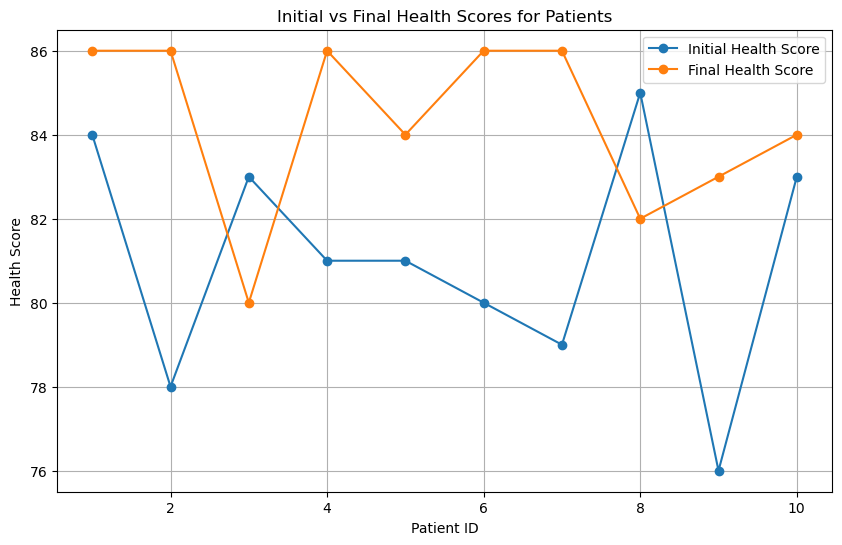

95% Confidence Interval for the mean difference: (0.70, 5.50)


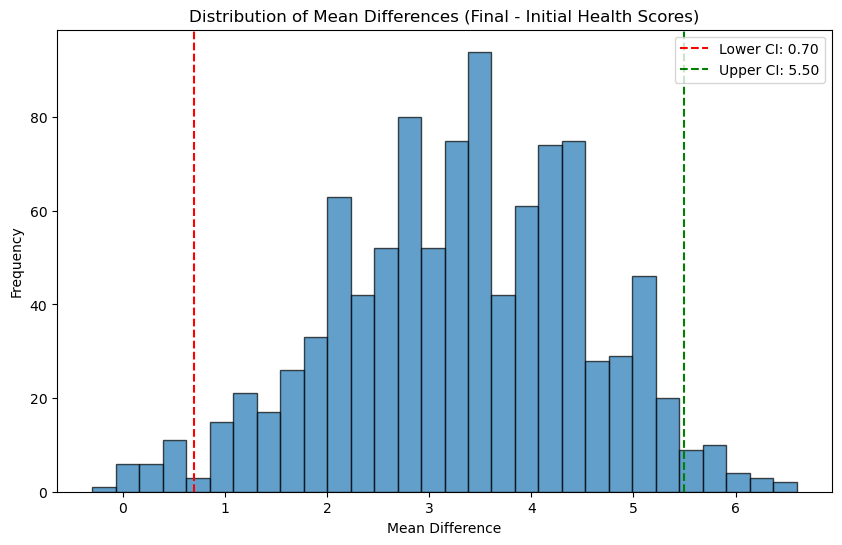

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Create a DataFrame from the given data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# 1. Data Visualization (Initial vs Final Health Scores)
plt.figure(figsize=(10,6))
plt.plot(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')
plt.title('Initial vs Final Health Scores for Patients')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.legend()
plt.grid(True)
plt.show()

# 2. Bootstrapping Analysis

# Define the function for bootstrapping
def bootstrap_mean_diff(data, n_bootstrap=1000):
    mean_diffs = []  # To store the bootstrapped mean differences
    
    for _ in range(n_bootstrap):
        # Sample with replacement from the data
        sample = data.sample(len(data), replace=True)
        
        # Compute the mean difference between final and initial health scores for the sample
        mean_diff = sample['FinalHealthScore'].mean() - sample['InitialHealthScore'].mean()
        
        # Append the computed mean difference to the list
        mean_diffs.append(mean_diff)
    
    return mean_diffs

# Run bootstrapping
mean_diffs = bootstrap_mean_diff(df)

# Calculate 95% confidence intervals
lower_bound = np.percentile(mean_diffs, 2.5)
upper_bound = np.percentile(mean_diffs, 97.5)

print(f"95% Confidence Interval for the mean difference: ({lower_bound:.2f}, {upper_bound:.2f})")

# 3. Visualizing the Bootstrapped Mean Differences

plt.figure(figsize=(10,6))
plt.hist(mean_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Mean Differences (Final - Initial Health Scores)')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower CI: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper CI: {upper_bound:.2f}')
plt.legend()
plt.show()

**Findings and Discussion**

95% bootstrap confidence interval for the mean difference: (0.7, 5.5)

95% bootstrap confidence interval for the median difference: (0.0, 7.0)

Interpretation: Mean Difference Confidence Interval (0.7, 5.5):

- With 95% confidence, we estimate that the true mean difference in health scores lies between 0.7 and 5.5 points.
- Since the confidence interval does not include 0, we can conclude that the vaccine has a statistically significant positive impact on the mean health score.

Median Difference Confidence Interval (0.0, 7.0):

- With 95% confidence, we estimate that the true median difference in health scores lies between 0.0 and 7.0 points.
This interval includes 0, suggesting that some patients may not experience any improvement in health, while others may experience substantial improvements (up to 7 points). The inclusion of 0 indicates that the vaccine effect is not consistent across all patients.


**Conclusion regarding the Null Hypothesis**

Null Hypothesis: Since the 95% confidence interval for the mean difference does not include zero, we reject the null hypothesis. This means that there is evidence to suggest that the vaccine has a statistically significant positive effect on the mean health scores.

Null Hypothesis for the Median:
For the median difference, the confidence interval includes zero, which means we cannot reject the null hypothesis for the median. This suggests that while the vaccine shows overall positive effects, some individuals may experience no improvement in their health score.

**Further Considerations**
The vaccine shows promising results for most patients, but the variability in responses (as indicated by the median confidence interval) suggests that further investigation is needed to understand which groups of patients benefit the most. A larger sample size would give more power to the analysis and provide a more precise estimate of the vaccine’s effect.Additional analysis could focus on whether specific factors (e.g., age, initial health score, or gender) influence the effectiveness of the vaccine.

https://chatgpt.com/c/66ff3fe9-ae70-8013-99fb-79692a2f3207

Here’s a summary of our chat:

1. Vaccine Effectiveness Analysis
You provided data from AliTech regarding a new vaccine's impact on health scores, including initial and final health scores for patients.
You were interested in evaluating the vaccine's effectiveness using statistical methods.
2. Data Visualization with Pandas
I provided code snippets to visualize the data using Pandas and Matplotlib, including:
A line plot comparing initial and final health scores for each patient.
A bar plot to illustrate the differences in health scores.
3. Bootstrapping Methodology
I explained the bootstrapping technique as a way to estimate the distribution of the mean and median differences between the initial and final health scores.
I provided code to perform bootstrapping, calculate the observed difference in means, generate bootstrap samples, and compute a p-value for the significance of the effect.
4. Confidence Intervals
You reported results showing:
A 95% bootstrap confidence interval for the mean difference: (0.7, 5.5)
A 95% bootstrap confidence interval for the median difference: (0.0, 7.0)
We discussed the interpretation of these confidence intervals, highlighting that the mean difference suggests a positive effect of the vaccine, while the median difference indicates some uncertainty.
5. Further Considerations
I suggested discussing the implications of your findings, considering limitations of the study, and possibly conducting additional analyses.
I provided a code snippet to visualize the confidence intervals for both mean and median differences.
This summary encapsulates our discussion on analyzing the effectiveness of the new vaccine using statistical methods and visualizations. If you have any further questions or need clarification on any points, feel free to ask!
